In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_palette("husl", 8)
sns.set_style('darkgrid')

In [16]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

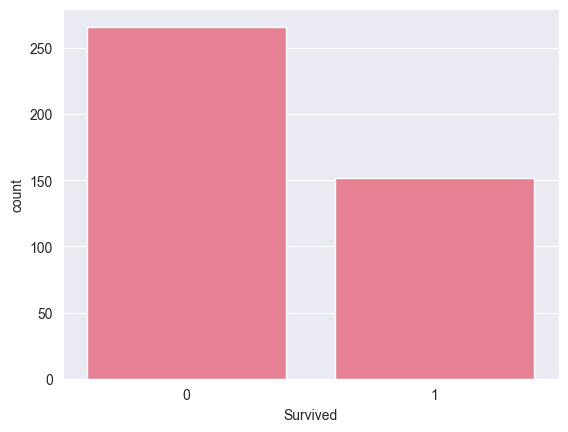

In [19]:
sns.countplot(x = 'Survived', data=df)


<Axes: xlabel='Survived', ylabel='count'>

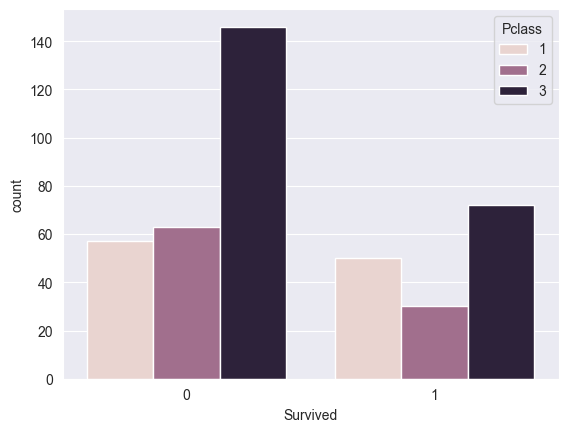

In [18]:
sns.countplot(x = 'Survived',hue = 'Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

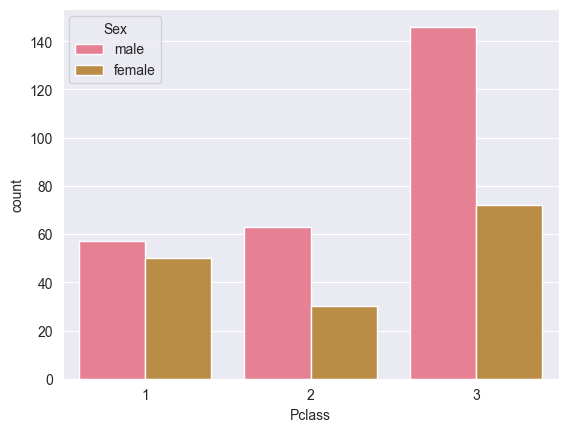

In [20]:
sns.countplot(x='Pclass',hue='Sex',data=df)

<Axes: xlabel='Age', ylabel='Count'>

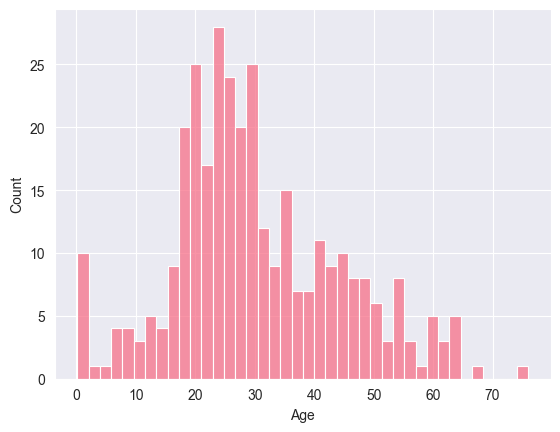

In [21]:
sns.histplot(df['Age'],bins=40)

<Axes: xlabel='Fare', ylabel='Count'>

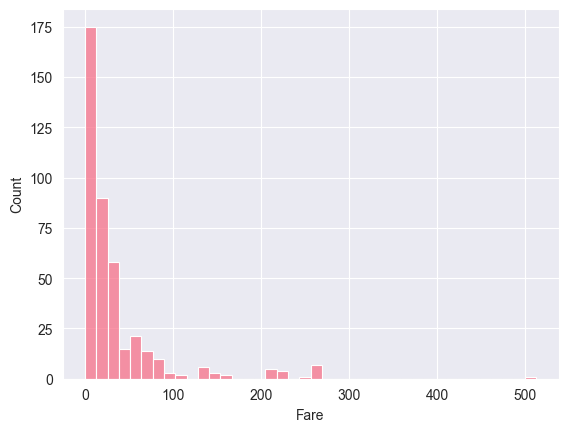

In [22]:
sns.histplot(df['Fare'],bins=40)

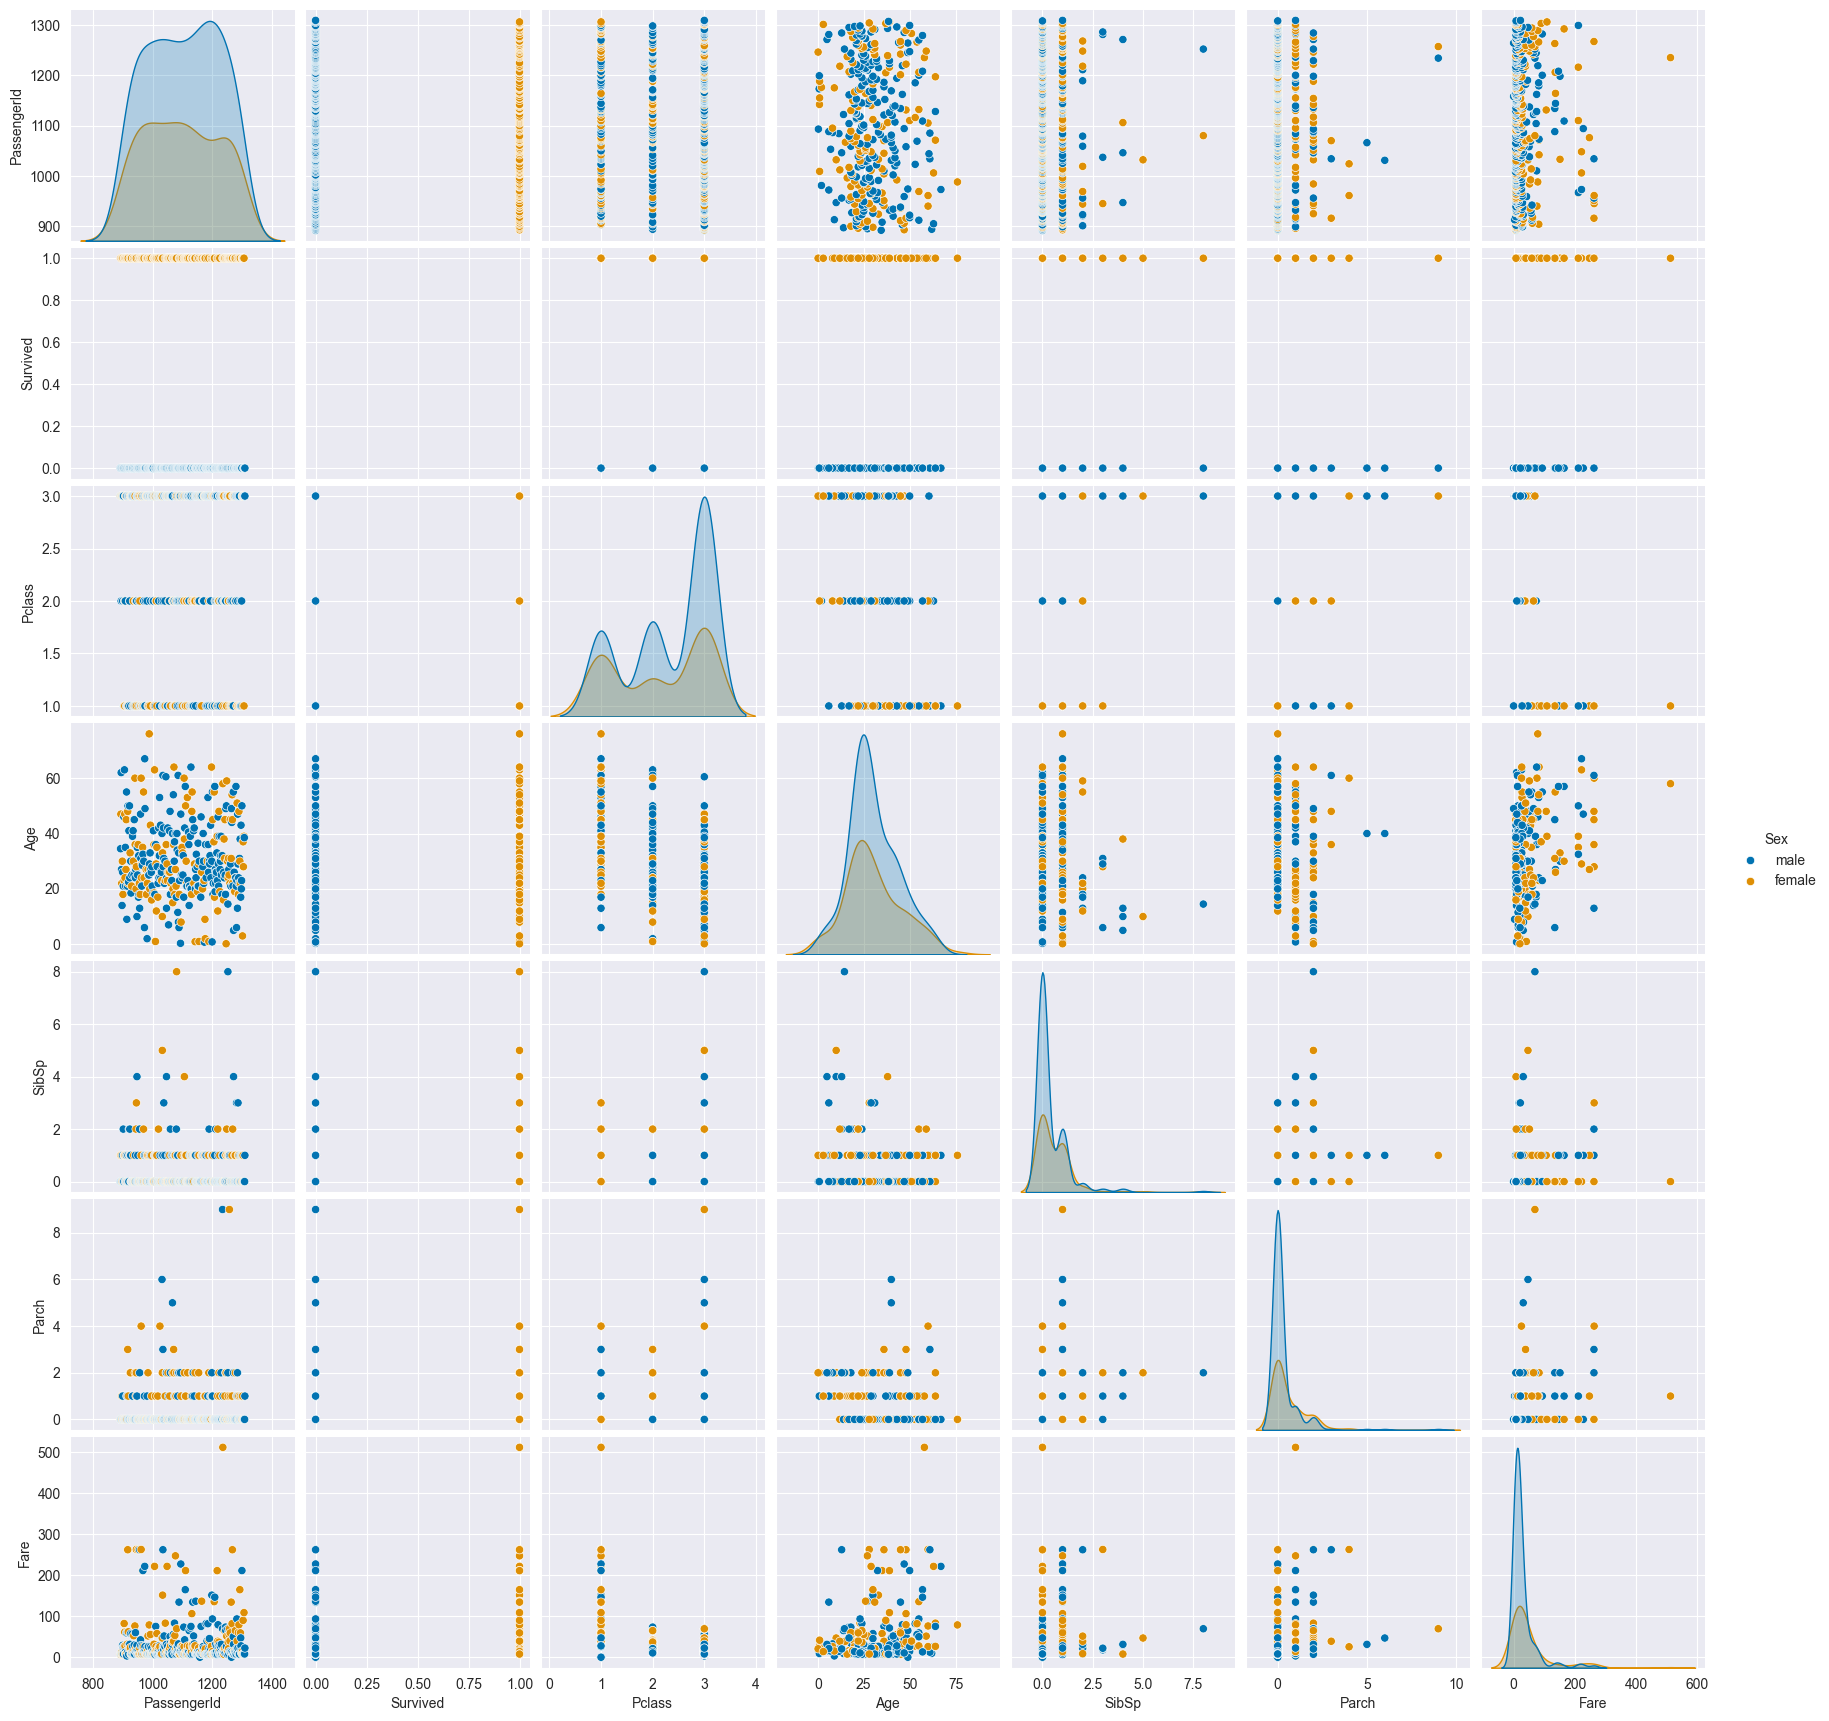

In [23]:
sns.pairplot(df,hue='Sex',palette='colorblind')

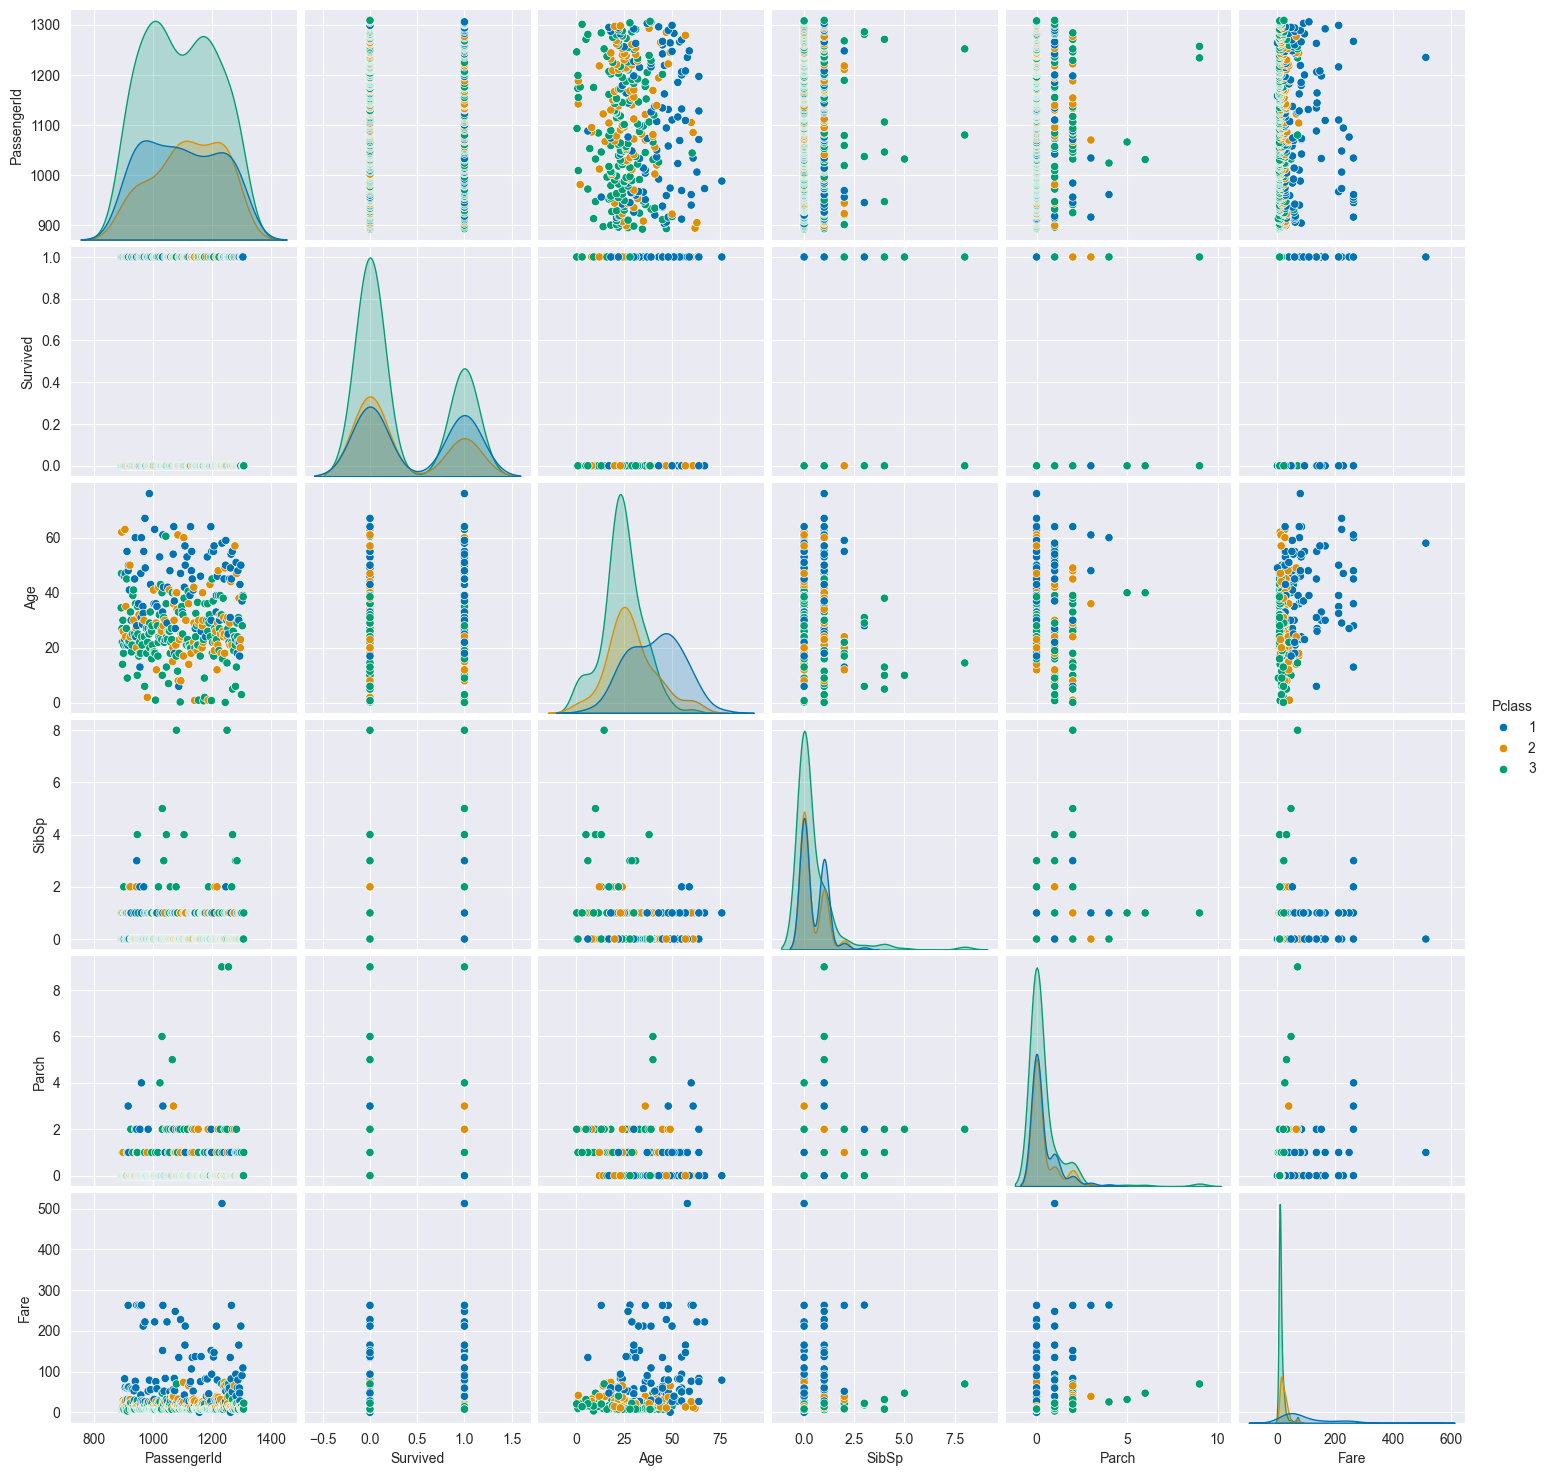

In [24]:
sns.pairplot(df, hue='Pclass', palette='colorblind')

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

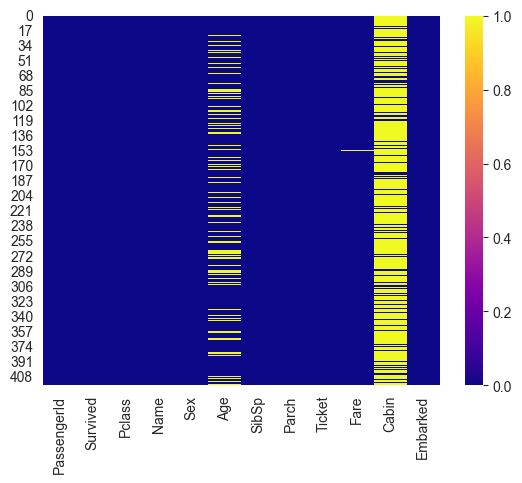

In [26]:
sns.heatmap(df.isnull(),cmap='plasma',cbar=True)

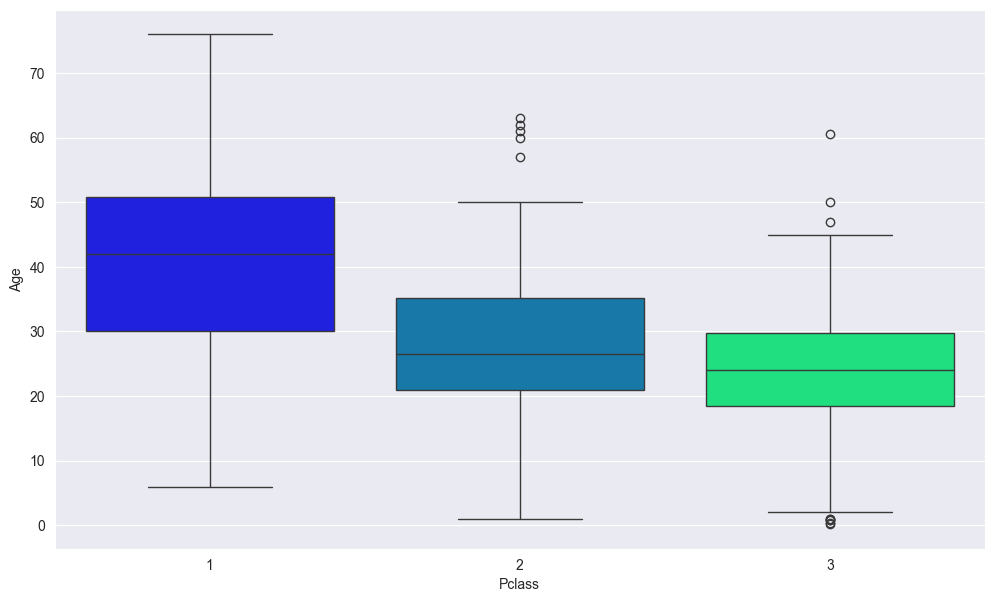

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', hue='Pclass', data=df, palette='winter', dodge=False)
plt.legend([],[], frameon=False) 
plt.show()

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [37]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\91703\AppData\Local\Temp\ipykernel_1884\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\91703\AppData\Local\Temp\ipykernel_1884\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [38]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [39]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

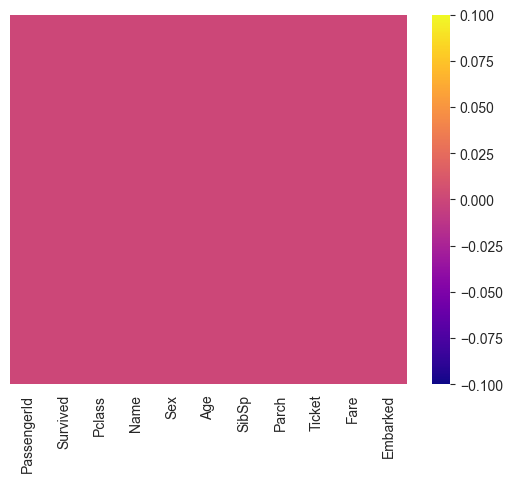

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma')

In [42]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,24.0,0,0,8.0500,S


In [44]:
df_new = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [45]:
df_new['Sex_female'] = df_new['Sex_female'].astype(int)
df_new['Sex_male'] = df_new['Sex_male'].astype(int)
df_new['Embarked_C'] = df_new['Embarked_C'].astype(int)
df_new['Embarked_Q'] = df_new['Embarked_Q'].astype(int)
df_new['Embarked_S'] = df_new['Embarked_S'].astype(int)

In [46]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,0,1,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,0,3,24.0,0,0,8.0500,0,1,0,0,1


In [47]:
df_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
X = df_new[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df_new['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=10)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
pred_knn = knn.predict(X_test)

In [60]:
print("Accuracy of Titanic Dataset using Knn = ",accuracy_score(y_test,pred_knn))

Accuracy of Titanic Dataset using Knn =  0.7028985507246377


In [61]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        92
           1       0.58      0.39      0.47        46

    accuracy                           0.70       138
   macro avg       0.66      0.62      0.63       138
weighted avg       0.69      0.70      0.69       138



In [62]:
print(confusion_matrix(y_test,pred_knn))

[[79 13]
 [28 18]]


In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC(kernel='rbf')

In [65]:
svc.fit(X_train,y_train)

SVC()

In [66]:
pred_svc = svc.predict(X_test)

In [67]:
print("Accuracy of Titanic Dataset using SVC = ",accuracy_score(y_test,pred_svc))

Accuracy of Titanic Dataset using SVC =  0.6811594202898551


In [68]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80        92
           1       0.67      0.09      0.15        46

    accuracy                           0.68       138
   macro avg       0.67      0.53      0.48       138
weighted avg       0.68      0.68      0.59       138



In [70]:
print(confusion_matrix(y_test,pred_svc))

[[90  2]
 [42  4]]
